In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
#connexion à drive pour le chargement du modèle
from google.colab import drive
drive.mount('/content/drive')
chemin_modele = '/content/drive/MyDrive/ProjetGreenAI/eco_sentinel_model.keras'

print("...")
try:
    model = tf.keras.models.load_model(chemin_modele)
    print(" Modèle chargé ")
except:
    print("fichier introuvable")

class_names = ['Animaux', 'Humains']

Mounted at /content/drive
...
 Modèle chargé 


In [18]:
def tester_image(nom_fichier):
    img_path = f"/content/{nom_fichier}"

    try:
        img = image.load_img(img_path, target_size=(224, 224))

        img_array = image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        #  prédiction
        predictions = model.predict(img_array)
        score = predictions[0]

        class_names_test = ['Animaux', 'Humains']

        classe_gagnante = class_names_test[np.argmax(score)]
        confiance = 100 * np.max(score)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"on voit: {classe_gagnante}\nConfiance : {confiance:.2f}%")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Erreur : {e}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


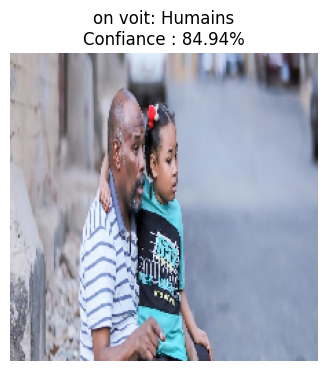

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


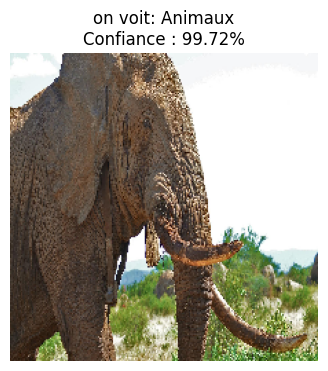

In [19]:
# TESTE TES IMAGES MAINTENANT
tester_image("test_human.jpg")
tester_image("test_elephant.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


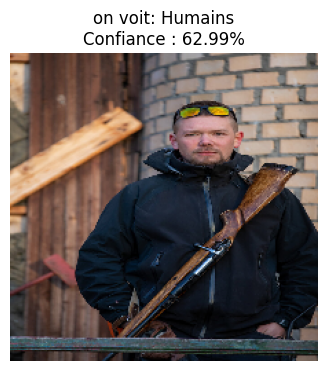

In [26]:
tester_image("test_huamin3.jpg")